### Set up (imports, set simulation and paths)

In [136]:
import hydrangea as hy
import numpy as np
import matplotlib.pyplot as plt

In [137]:
sim = hy.Simulation(11)
snap = 11
ifof = 0  # FOF index to investigate; 0 = most massive cluster
snap_dir = sim.get_snapshot_file(snap)
sub_dir = sim.get_subfind_file(snap)

In [138]:
fof = hy.SplitFile(sub_dir, 'FOF', read_index=ifof)
sub = hy.SplitFile(sub_dir, 'Subhalo')

Prepared reading from 'FOF'...
Prepared reading from 'SUBHALO'...


### Check for consistency between FOF and central coordinates

In [141]:
sfof = fof.FirstSubhaloID
cfof = fof.GroupCentreOfPotential
print(f'FOF centre is at {cfof}')
print(f'Central subhalo is {sfof}')
print(f'Central subhalo is at {sub.CentreOfPotential[sfof, :]}')

FOF centre is at [792.4411  795.57733 791.7485 ]
Central subhalo is 0
Central subhalo is at [792.4411  795.57733 791.7485 ]


### Make a map of reasonably massive subhaloes

(-1.0, 1.0)

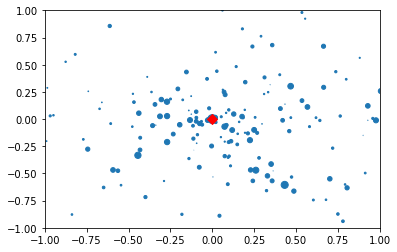

In [144]:
ax = plt.gca()
ind_plt = np.nonzero((np.abs(sub.CentreOfPotential[:, 2]-cfof[2]) < 1.0) &
                     (sub.Mass > 1e10))[0]
ax.scatter(sub.CentreOfPotential[ind_plt, 0]-cfof[0], sub.CentreOfPotential[ind_plt, 1]-cfof[1],
           s=(np.log10(sub.Mass[ind_plt])-10.0)*20)
ax.scatter(sub.CentreOfPotential[sfof, 0]-cfof[0], sub.CentreOfPotential[sfof, 1]-cfof[1],
           s=50, color='red', marker='D')
ax.set_xlim((-1.0, 1.0))
ax.set_ylim((-1.0, 1.0))

### Make an image of the DM particle distribution

In [145]:
rr = hy.ReadRegion(snap_dir, 1, cfof, 1.0, exact=True)

Checking 1452 cells...
Retained 164 segments (11.28%...)
Retained 48 segments (29.27%...)
Reading 'Coordinates' took 1.845 sec.
Region setup took 4.160 sec.
Selection region contains 1452 cells, 48 segments, 15981438 particles, 3 files
Exact selection region contains 12244208 particles.


In [164]:
size = 1.0
shist, xedges, yedges = np.histogram2d(rr.Coordinates[:, 0]-cfof[0],
                                       rr.Coordinates[:, 1]-cfof[1], bins=100,
                                       weights=np.zeros(rr.Coordinates.shape[0])+9.7e6,#rrs.Mass,
                                       range=[[-size, size], [-size, size]])

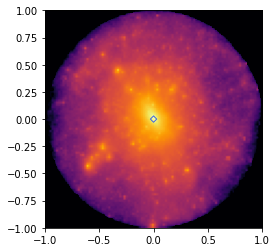

In [171]:
plt.imshow(np.log10(shist+1e-10), vmin=8,
           extent=[-size, size, -size, size], cmap=plt.cm.inferno, aspect='equal')
plt.scatter(0, 0, marker='D', edgecolor='royalblue', facecolor='none', s=20)

### Make profiles of the particles

In [159]:
profiles = []
for iptype in [0, 1, 4, 5]:
    rrx = hy.ReadRegion(snap_dir, iptype, cfof, 1.0)
    radx = np.linalg.norm(rrx.Coordinates - cfof[None, :], axis=1)
    massx = rrx.Mass if iptype != 1 else np.zeros(radx.shape[0])+9.7e6
    hist, edges = np.histogram(np.log10(radx), bins=30, weights=massx, range=[-2, 1])
    volumes = 4/3 * np.pi * (10.0**edges[1:]**3 - 10.0**edges[:-1]**3)
    rmid = edges[:-1] + (edges[1:] - edges[:-1]) / 2
    profiles.append(hist/volumes)

Checking 1452 cells...
Retained 162 segments (11.16%...)
Retained 45 segments (27.78%...)
Region setup took 0.380 sec.
Selection region contains 1452 cells, 45 segments, 14046118 particles, 2 files
Reading 'Coordinates' took 1.649 sec.
Reading 'Mass' took 0.574 sec.
Checking 1452 cells...
Retained 164 segments (11.28%...)
Retained 48 segments (29.27%...)
Region setup took 0.210 sec.
Selection region contains 1452 cells, 48 segments, 15981438 particles, 3 files
Reading 'Coordinates' took 1.905 sec.
Checking 252 cells...
Retained 39 segments (19.31%...)
Region setup took 0.030 sec.
Selection region contains 252 cells, 39 segments, 1592378 particles, 4 files
Reading 'Coordinates' took 0.224 sec.
Reading 'Mass' took 0.063 sec.
Checking 4 cells...
Region setup took 0.000 sec.
Selection region contains 4 cells, 6 segments, 3819 particles, 3 files
Reading 'Coordinates' took 0.007 sec.
Reading 'Mass' took 0.006 sec.


/software/rhel7/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/software/rhel7/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/software/rhel7/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/software/rhel7/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


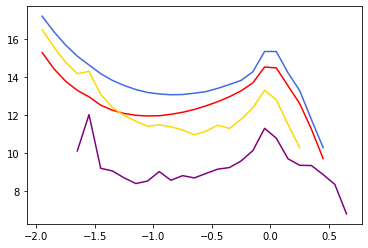

In [161]:
colors = ['red', 'royalblue', 'gold', 'purple']
for iiprof, iprof in enumerate(profiles):
    plt.plot(rmid, np.log10(iprof), color=colors[iiprof])